# Spam Detection Project using Binary Classification

Detecting spam alerts in emails and messages is one of the main applications that every big tech company tries to improve for its customers. Apple’s official messaging app and Google’s Gmail are great examples of such applications where spam detection works well to protect users from spam alerts. 

Whenever you submit details about your email or contact number on any platform, it has become easy for those platforms to market their products by advertising them by sending emails or by sending messages directly to your contact number. This results in lots of spam alerts and notifications in your inbox. This is where the task of spam detection comes in.

Spam detection means detecting spam messages or emails by understanding text content so that you can only receive notifications about messages or emails that are very important to you. If spam messages are found, they are automatically transferred to a spam folder and you are never notified of such alerts. This helps to improve the user experience, as many spam alerts can bother many users.

https://thecleverprogrammer.com/2021/06/27/spam-detection-with-machine-learning/

## Setup

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Prepare the data

In [101]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/SMS-Spam-Detection/master/spam.csv", encoding= 'latin-1')
data.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [102]:
data = data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis= 1) #remove unneeded columns
data.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [103]:
data.describe()

,class,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [104]:
data.isna().sum().sort_values() #none of the rows are empty!

class      0
message    0
dtype: int64

In [105]:
#set up the arrays for analysis
x = data['message'].values
y = data['class'].values

## Tokenization and Numericalization

In [106]:
count_vectorizer = CountVectorizer()
tokenized_sparse_matrix = count_vectorizer.fit_transform(x)
tokenized_sparse_matrix.shape #the sparse matrix has 5,572 rows and 8,672 columns. 
#The non-zero cells represent tokenized words and also indicate the number of occurrences of them

(5572, 8672)

In [107]:
count_vectorizer.vocabulary_.get('and') #the word 'and' appeared 1084 times

1084

## Split the data and train

In [108]:
#split the data into training and test groups
x_train, x_test, y_train, y_test = train_test_split(tokenized_sparse_matrix,y,test_size=0.2,random_state=1)

In [109]:
#iniitalize the model and fit it
multinomialNB_model = MultinomialNB()
multinomialNB_model.fit(x_train, y_train)

MultinomialNB()

In [110]:
y_pred = multinomialNB_model.predict(x_test)

## Evaluate our baseline model

I am using Multinomial Naive Bayes as our baseline since the original article linked above used it

In [111]:
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(multinomialNB_model, tokenized_sparse_matrix, y, cv=kf)

In [112]:
cv_scores #the model works well with different groups as test data

array([0.98385361, 0.98815931, 0.9795479 , 0.98062433, 0.97090517,
       0.98060345])

In [113]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[960  16]
 [  8 131]]
              precision    recall  f1-score   support

         ham       0.99      0.98      0.99       976
        spam       0.89      0.94      0.92       139

    accuracy                           0.98      1115
   macro avg       0.94      0.96      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## Compare different models

In [131]:
models = {'MultinomialNB Model':MultinomialNB(),"KNN": KNeighborsClassifier(n_neighbors= 3), "SVC": SVC(), "Decision Tree Classifier":DecisionTreeClassifier(max_depth=5), 
         "Random Forest Classifier":RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
         'MLP Classifier':MLPClassifier(alpha=1, max_iter=1000), "Ada Boost Classifier": AdaBoostClassifier()}

In [132]:
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model, tokenized_sparse_matrix, y, cv=kf)
  
  # Append the results
  results.append(cv_scores)

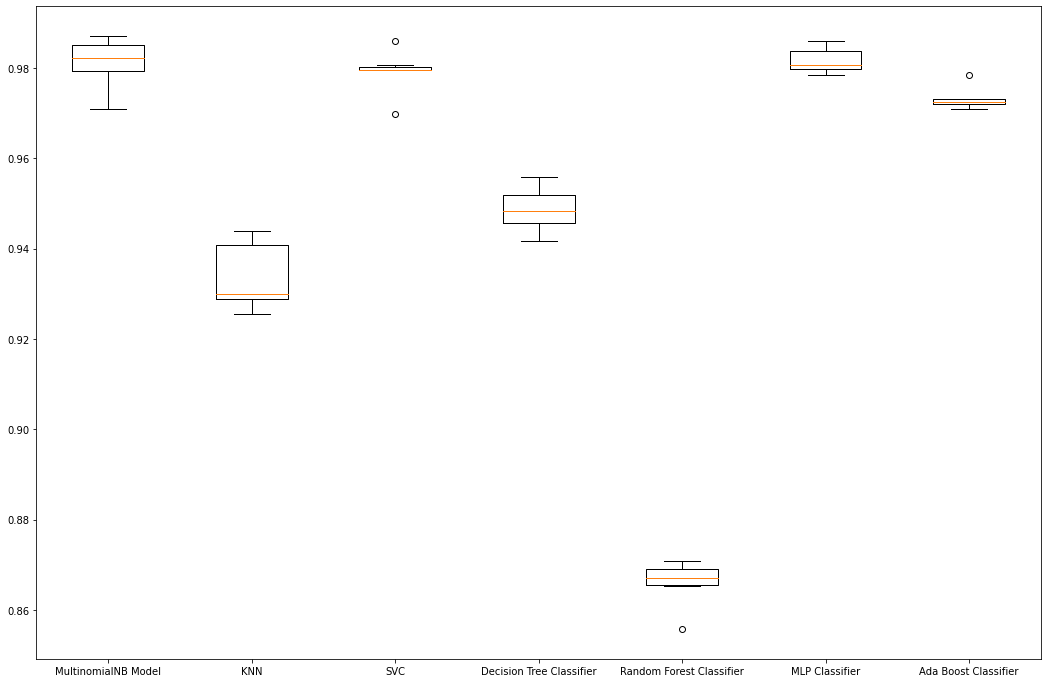

In [133]:
# Create a box plot of the results
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(12)
plt.boxplot(results, labels=models.keys())
plt.show()

**In conclusion, Multinomial Naive Bayes is the best model as suggested by the original linked article, however a 
Support Vector Machine gives similar results with less variance given different test and training data**